The internal kinematic of the globular cluster NGC6397 is problematic. The cluster proper mation seems expending whereas the cluster is going away from us. 


See 
https://docs.google.com/presentation/d/1hnm1pcW6jR4oDwvzh3UFHCv97y2O1gOOIowooWHE__4/edit#slide=id.g3a35f63a45_0_146

In [1]:
url="http://vospace.esac.esa.int/vospace/sh/5ee7b75719bfcddb12294f0e87094ddc563866b?dl=1"

In [176]:
%matplotlib inline

In [3]:
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [178]:
mp.rcParams['figure.figsize'] = (12, 8)

In [5]:
pwd

'/Users/abombrun/Documents/GitHub/GaiaFun'

In [6]:
from astropy.table import Table 

t = Table.read(url,format='votable')

d = pd.DataFrame(np.array(t))

d.to_csv("~/tmp/data/NGC6397.csv")

In [7]:
d = pd.read_csv("~/tmp/data/NGC6397.csv")

In [8]:
d.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147476 entries, 0 to 147475
Columns: 97 entries, Unnamed: 0 to epoch_photometry_url
dtypes: bool(2), float64(71), int64(20), object(4)
memory usage: 107.2+ MB


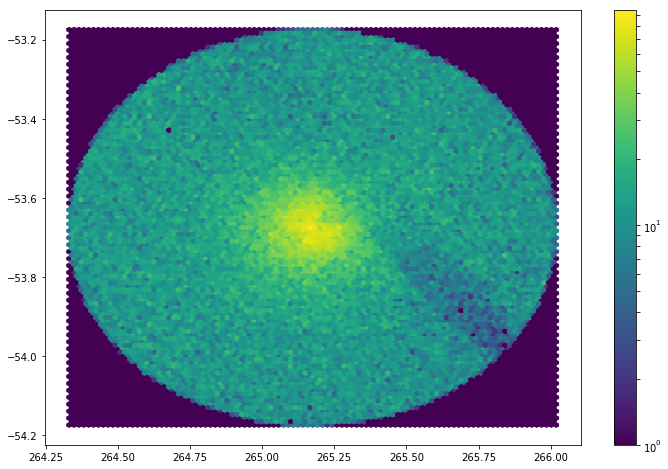

In [119]:
plt.hexbin(d.ra,d.dec,norm=mp.colors.LogNorm())
plt.colorbar()

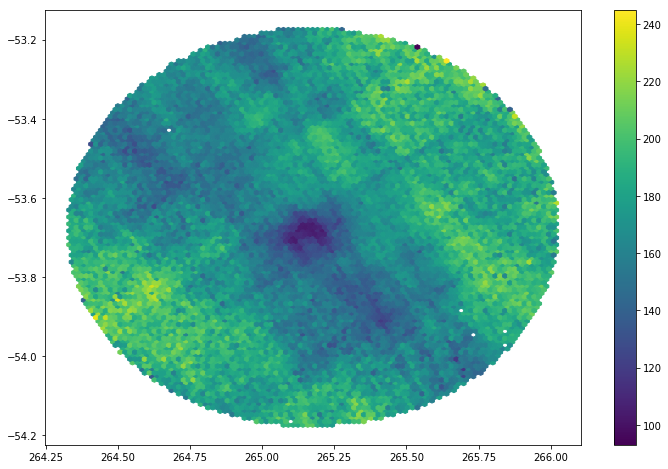

In [120]:
plt.hexbin(d.ra,d.dec,C=d.astrometric_n_good_obs_al)
plt.colorbar()

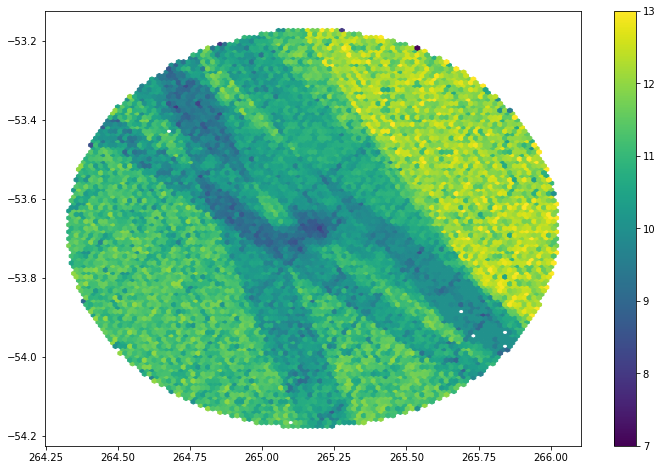

In [121]:
plt.hexbin(d.ra,d.dec,C=d.visibility_periods_used)
plt.colorbar()

In [124]:
d.columns

Index(['Unnamed: 0', 'solution_id', 'designation', 'source_id', 'random_index',
       'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec',
       'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr',
       'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
       'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_params_solved',
       'astrometric_primary_flag', 'astrometric_weight_al',
       'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error',
       'mean_varpi_factor_al', 'astrometric_matched_observations',
       'visibility_periods_used', 'astrometric_sigma5d_max',
       'frame_rotator

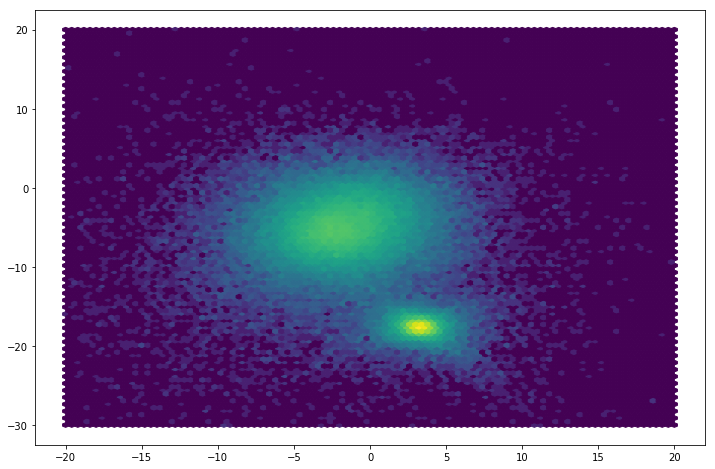

In [15]:
plt.hexbin(d.pmra,d.pmdec,norm=mp.colors.LogNorm(),extent=(-20,20,-30,20))

(-30, 20)

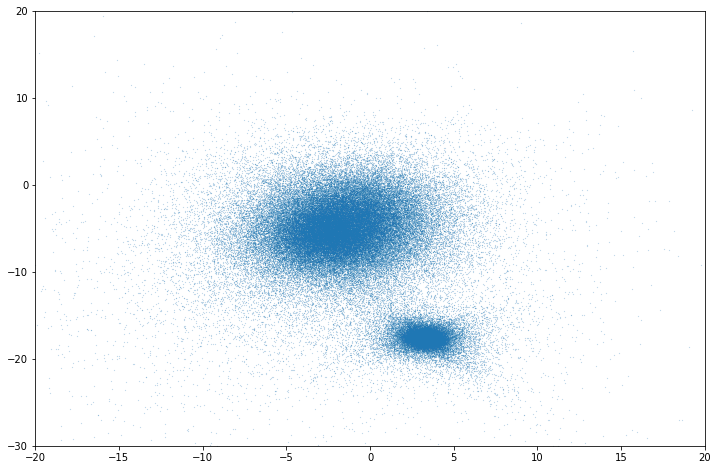

In [26]:
plt.scatter(d.pmra,d.pmdec,s=0.01)
plt.xlim(-20,20)
plt.ylim(-30,20)

In [83]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from astropy import units as u

In [39]:
d = d[~d.pmra.isna()]

In [40]:
X = d[['pmra','pmdec']].values
X = StandardScaler().fit_transform(X)

In [75]:
gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [76]:
d['label'] = gmm.predict(X)

should be improved

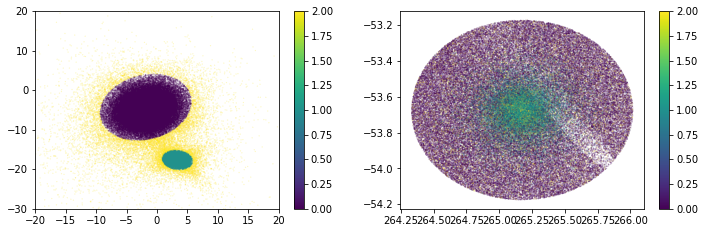

In [86]:
plt.subplot(221)
plt.scatter(d.pmra,d.pmdec,s=0.01,c=d.label)
plt.xlim(-20,20)
plt.ylim(-30,20)
plt.colorbar()

plt.subplot(222)
plt.scatter(d.ra,d.dec,s=0.01,c=d.label)
plt.colorbar()

In [62]:
s = d[d.label==1]

In [167]:
s[['ra','dec','parallax','pmra','pmdec']].median()

ra          265.169598
dec         -53.677665
parallax      0.402858
pmra          3.290945
pmdec       -17.599487
dtype: float64

In [168]:
s.ra.count()

27260

In [63]:
m = s.parallax.median()

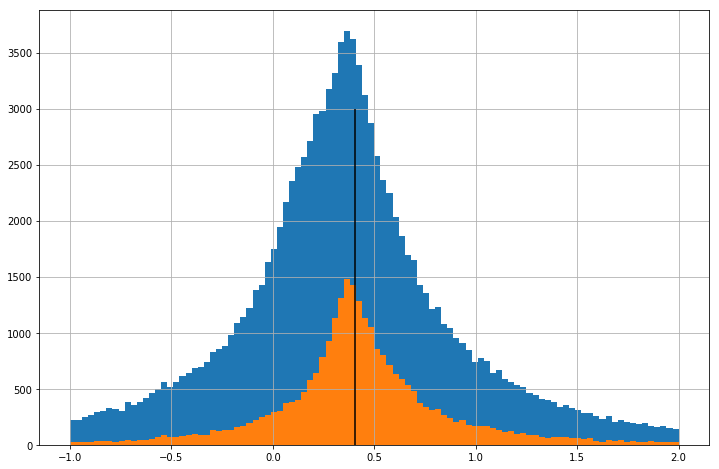

In [64]:
d.parallax.hist(bins=100,range=(-1,2))
s.parallax.hist(bins=100,range=(-1,2))
plt.vlines(m,0,3000)

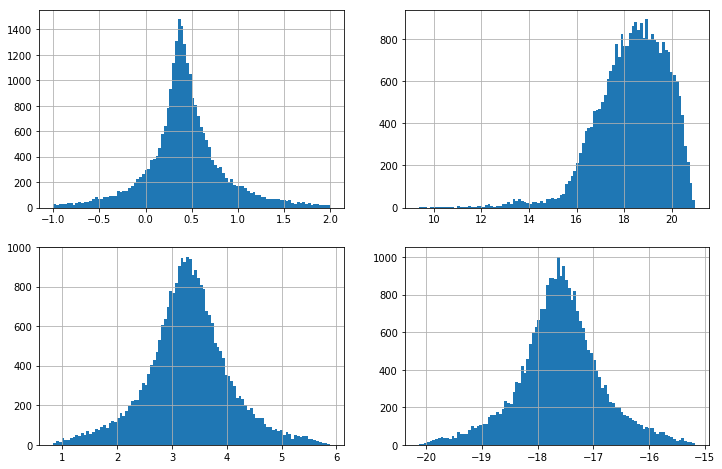

In [175]:
plt.subplot(221)
s.parallax.hist(bins=100,range=(-1,2))
plt.subplot(222)
s.phot_g_mean_mag.hist(bins=100)
plt.subplot(223)
s.pmra.hist(bins=100)
plt.subplot(224)
s.pmdec.hist(bins=100)

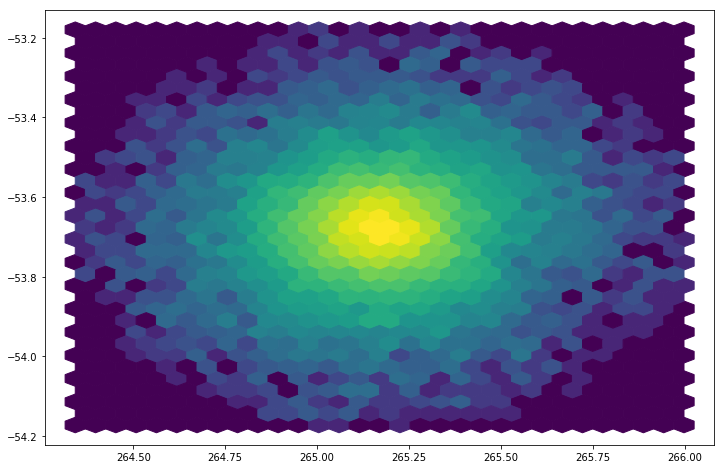

In [89]:
plt.hexbin(s.ra,s.dec,norm=mp.colors.LogNorm(),gridsize=30)

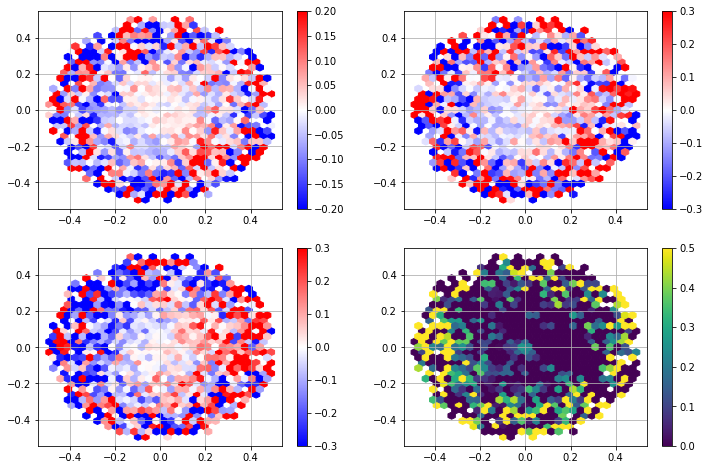

In [164]:
x,y = (s.ra-s.ra.median())*np.cos(s.dec*u.deg.to(u.rad)),s.dec-s.dec.median(),

plt.subplot(221)
plt.hexbin(x,y,C=s.parallax-m,
         gridsize=30,
           reduce_C_function=np.median,
           cmap=mp.cm.bwr,vmin=-0.2,vmax=0.2)
plt.colorbar()
plt.grid()

plt.subplot(222)
plt.hexbin(x,y,C=s.pmdec-s.pmdec.median(),
         gridsize=30,
           reduce_C_function=np.median,
           cmap=mp.cm.bwr,vmin=-0.3,vmax=0.3)
plt.colorbar()
plt.grid()

plt.subplot(223)
plt.hexbin(x,y,C=s.pmra-s.pmra.median(),
         gridsize=30,
           reduce_C_function=np.median,
           cmap=mp.cm.bwr,vmin=-0.3,vmax=0.3)
plt.colorbar()
plt.grid()

plt.subplot(224)
plt.hexbin(x,y,C=s.astrometric_excess_noise,
         gridsize=30,
           reduce_C_function=np.median,vmin=0,vmax=0.5)
plt.colorbar()
plt.grid()


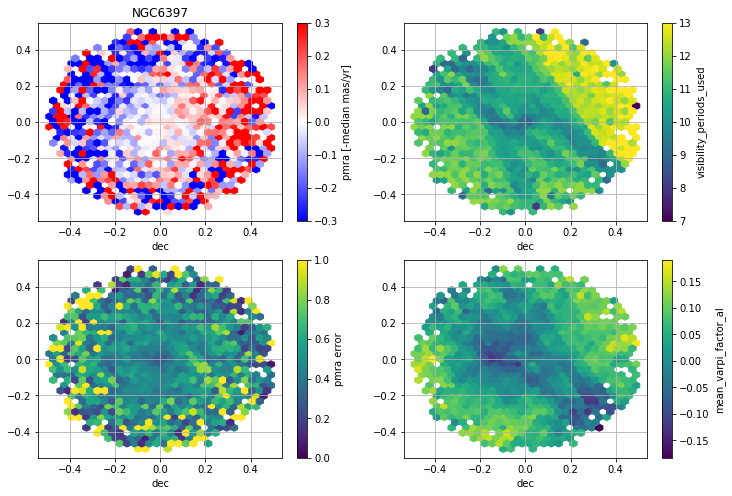

In [182]:
plt.subplot(221)
x,y = (s.ra-s.ra.median())*np.cos(s.dec*u.deg.to(u.rad)),s.dec-s.dec.median(),
plt.hexbin(x,y,C=s.pmra-s.pmra.median(),
         gridsize=30,
           reduce_C_function=np.median,
           cmap=mp.cm.bwr,vmin=-0.3,vmax=0.3)
plt.colorbar(label="pmra [-median mas/yr]")
plt.xlabel("ra")
plt.xlabel("dec")
plt.title("NGC6397")
plt.grid()

plt.subplot(222)
x,y = (s.ra-s.ra.median())*np.cos(s.dec*u.deg.to(u.rad)),s.dec-s.dec.median(),
plt.hexbin(x,y,C=s.visibility_periods_used,
         gridsize=30)
plt.colorbar(label="visibility_periods_used")
plt.xlabel("ra")
plt.xlabel("dec")
plt.grid()


plt.subplot(223)
x,y = (s.ra-s.ra.median())*np.cos(s.dec*u.deg.to(u.rad)),s.dec-s.dec.median(),
plt.hexbin(x,y,C=s.pmra_error,reduce_C_function=np.median,
         gridsize=30,vmin=0,vmax=1)
plt.colorbar(label="pmra error")
plt.xlabel("ra")
plt.xlabel("dec")
plt.grid()


plt.subplot(224)
x,y = (s.ra-s.ra.median())*np.cos(s.dec*u.deg.to(u.rad)),s.dec-s.dec.median(),
plt.hexbin(x,y,C=s.mean_varpi_factor_al,reduce_C_function=np.median,
         gridsize=30)
plt.colorbar(label="mean_varpi_factor_al")
plt.xlabel("ra")
plt.xlabel("dec")
plt.grid()



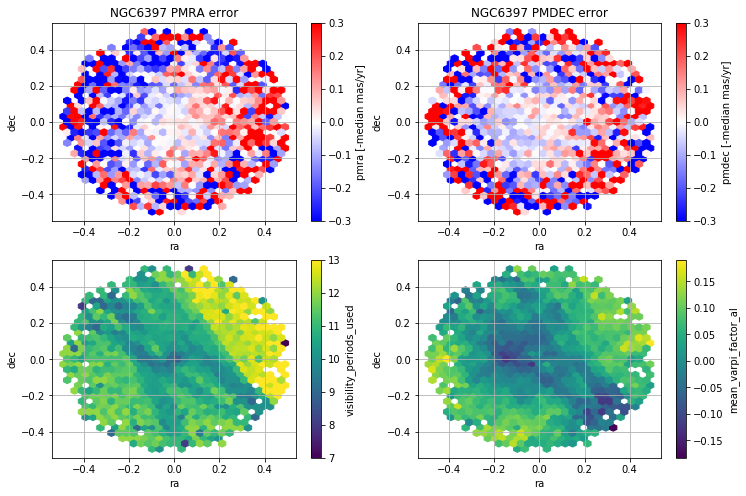

In [186]:
plt.subplot(221)
x,y = (s.ra-s.ra.median())*np.cos(s.dec*u.deg.to(u.rad)),s.dec-s.dec.median(),
plt.hexbin(x,y,C=s.pmra-s.pmra.median(),
         gridsize=30,
           reduce_C_function=np.median,
           cmap=mp.cm.bwr,vmin=-0.3,vmax=0.3)
plt.colorbar(label="pmra [-median mas/yr]")
plt.xlabel("ra")
plt.ylabel("dec")
plt.title("NGC6397 PMRA error")
plt.grid()

plt.subplot(222)
x,y = (s.ra-s.ra.median())*np.cos(s.dec*u.deg.to(u.rad)),s.dec-s.dec.median(),
plt.hexbin(x,y,C=s.pmdec-s.pmdec.median(),
         gridsize=30,
           reduce_C_function=np.median,
           cmap=mp.cm.bwr,vmin=-0.3,vmax=0.3)
plt.colorbar(label="pmdec [-median mas/yr]")
plt.xlabel("ra")
plt.ylabel("dec")
plt.title("NGC6397 PMDEC error")
plt.grid()




plt.subplot(223)
x,y = (s.ra-s.ra.median())*np.cos(s.dec*u.deg.to(u.rad)),s.dec-s.dec.median(),
plt.hexbin(x,y,C=s.visibility_periods_used,
         gridsize=30)
plt.colorbar(label="visibility_periods_used")
plt.xlabel("ra")
plt.ylabel("dec")
plt.grid()

plt.subplot(224)
x,y = (s.ra-s.ra.median())*np.cos(s.dec*u.deg.to(u.rad)),s.dec-s.dec.median(),
plt.hexbin(x,y,C=s.mean_varpi_factor_al,reduce_C_function=np.median,
         gridsize=30)
plt.colorbar(label="mean_varpi_factor_al")
plt.xlabel("ra")
plt.ylabel("dec")
plt.grid()


In [ ]:
x,y = (s.ra-s.ra.median())*np.cos(s.dec*u.deg.to(u.rad)),s.dec-s.dec.median(),
plt.hexbin(x,y,C=s.,
         gridsize=50)
plt.colorbar()

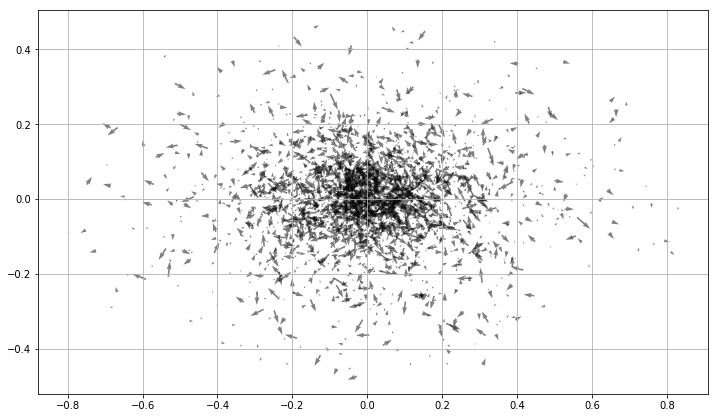

In [111]:
ax = plt.subplot(111)
ss =  s.sample(frac=0.1)
ax.quiver((ss.ra-ss.ra.median()),ss.dec-ss.dec.median(),
           ss.pmra-ss.pmra.median(),ss.pmdec-ss.pmdec.median(),scale=100,alpha=0.5)
ax.set_aspect('equal')
ax.grid()

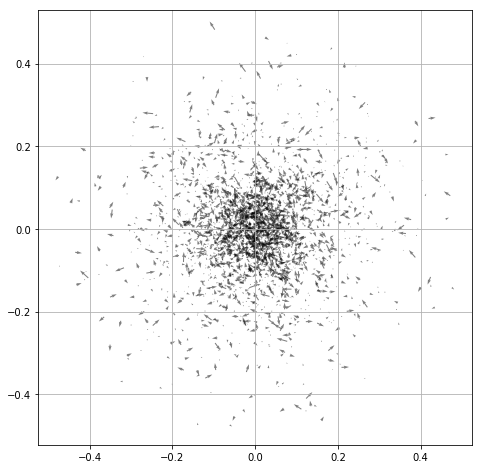

In [114]:
ax = plt.subplot(111)
ss =  s.sample(frac=0.1)
ax.quiver((ss.ra-ss.ra.median())*np.cos(ss.dec*u.deg.to(u.rad)),ss.dec-ss.dec.median(),
          ss.pmra-ss.pmra.median(),ss.pmdec-ss.pmdec.median(),scale=100,alpha=0.5)
ax.set_aspect('equal')
ax.grid()

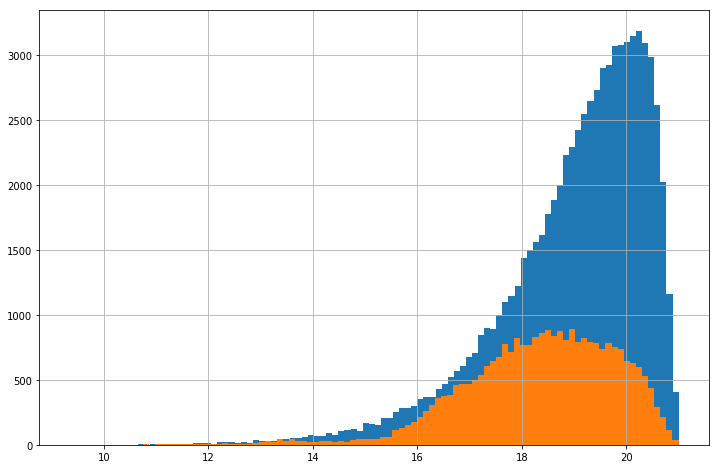

In [134]:
s0.phot_g_mean_mag.hist(bins=100)
s.phot_g_mean_mag.hist(bins=100)

In [127]:
s0 = d[d.label==0]

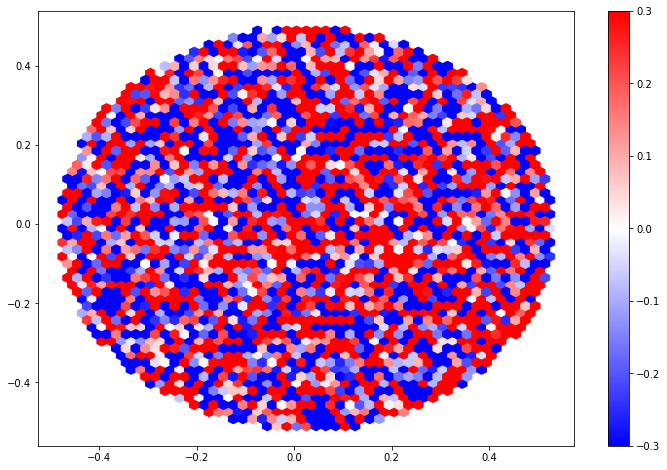

In [130]:
x,y = (s0.ra-s0.ra.median())*np.cos(s0.dec*u.deg.to(u.rad)),s0.dec-s0.dec.median(),
plt.hexbin(x,y,C=s0.pmra-s0.pmra.median(),
         gridsize=50,
           reduce_C_function=np.median,
           cmap=mp.cm.bwr,vmin=-0.3,vmax=0.3)
plt.colorbar()